# Clustering metrics - alternatives to the _elbow method_
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

Clustering is an important part of the machine learning pipeline for business or scientific enterprises utilizing data science. As the name suggests, it helps to identify congregations of closely related (by some measure of distance) data points in a blob of data, which, otherwise, would be difficult to make sense of.

A popular method like k-means clustering does not seem to provide a completely satisfactory answer when we ask the basic question: 
> **"How would we know the actual number of clusters, to begin with?"**

This question is critically important because of the fact that the process of clustering is often a precursor to further processing of the individual cluster data and therefore, the amount of computational resource may depend on this measurement. 

In the case of a business analytics problem, repercussion could be worse. Clustering is often done for such analytics with the goal of market segmentation. It is, therefore, easily conceivable that, depending on the number of clusters, appropriate marketing personnel will be allocated to the problem. Consequently, a wrong assessment of the number of clusters can lead to sub-optimum allocation of precious resources.

For the k-means clustering method, the most common approach for answering this question is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

In this notebook, we show what metric to use for visualizing and determining an optimal number of clusters much better than the usual practice - elbow method.

---

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Create synthetic data using Scikit learn `make_blob` method

- Number of features: 4
- Number of clusters: 5
- Number of samples: 200

In [49]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [50]:
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

In [51]:
data1 = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std)

In [52]:
d1 = data1[0]

In [53]:
df1=pd.DataFrame(data=d1,columns=['Feature_'+str(i) for i in range(1,n_features+1)])
df1.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,-5.482548,-3.686606,2.090874,-7.795471
1,-1.010762,-7.181558,3.955000,-2.671549
2,-4.122613,9.416866,-1.574501,4.690979
3,-2.137911,-6.935666,7.010733,-2.314054
4,-1.489583,-9.091330,3.495685,-2.116901


In [54]:
from itertools import combinations

In [55]:
lst_vars=list(combinations(df1.columns,2))

In [56]:
len(lst_vars)

6

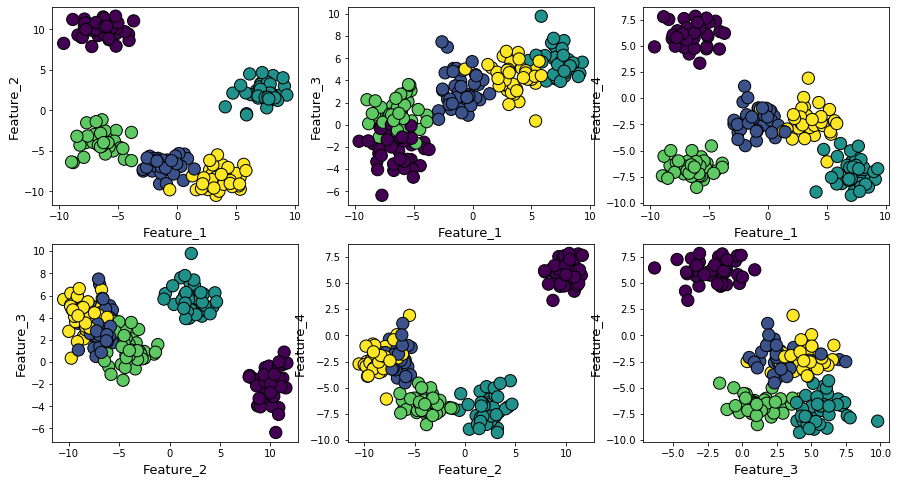

In [57]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df1[dim1],df1[dim2],c=data1[1],edgecolor='k',s=150)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

### How are the classes separated (boxplots)

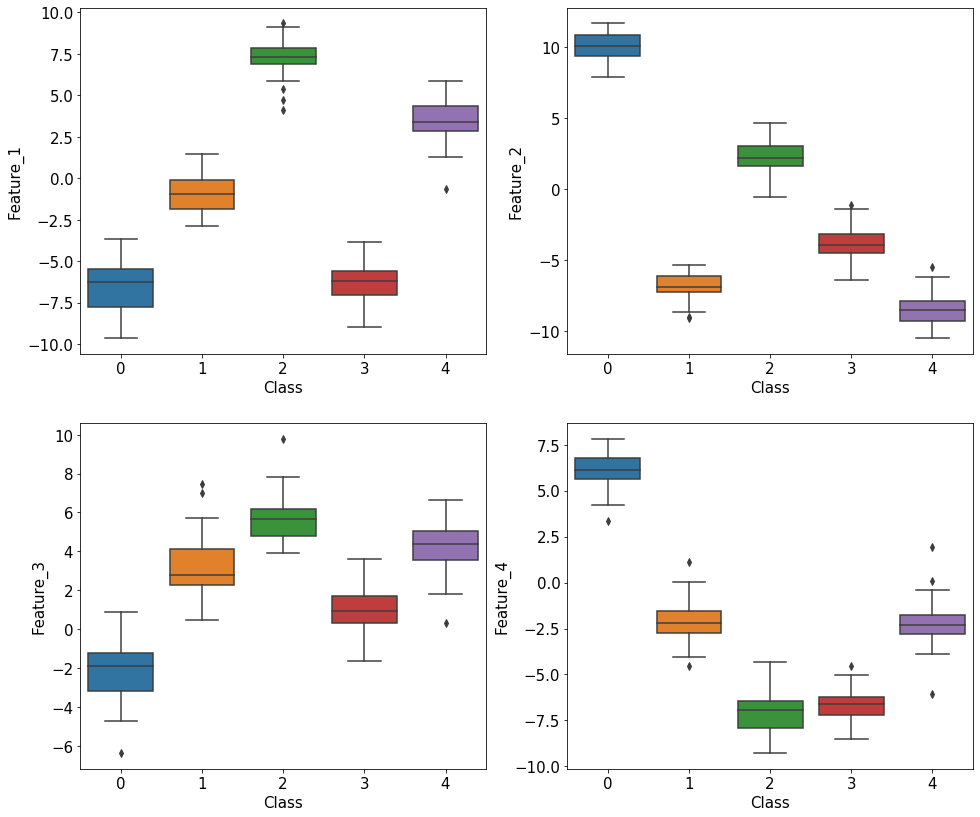

In [58]:
plt.figure(figsize=(16,14))
for i,c in enumerate(df1.columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df1[c],x=data1[1])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

## k-means clustering

In [59]:
from sklearn.cluster import KMeans

### Unlabled data

In [60]:
X=df1

In [61]:
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,-5.482548,-3.686606,2.090874,-7.795471
1,-1.010762,-7.181558,3.955000,-2.671549
2,-4.122613,9.416866,-1.574501,4.690979
3,-2.137911,-6.935666,7.010733,-2.314054
4,-1.489583,-9.091330,3.495685,-2.116901


In [62]:
y=data1[1]

### Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

In [65]:
X_scaled=scaler.fit_transform(X)

### Metrics

In [66]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

### Running k-means and computing inter-cluster distance score for various *k* values

In [67]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -25.255763297890017
Silhouette score for number of cluster(s) 2: 0.6063168925445052
Davies Bouldin score for number of cluster(s) 2: 0.48589612083683936
V-measure score for number of cluster(s) 2: 0.47435098761403227
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -12.472664089914879
Silhouette score for number of cluster(s) 3: 0.596581487010715
Davies Bouldin score for number of cluster(s) 3: 0.5470092656424891
V-measure score for number of cluster(s) 3: 0.7424834172925047
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -4.885046633213976
Silhouette score for number of cluster(s) 4: 0.6583286372904411
Davies Bouldin score for number of cluster(s) 4: 0.463348372038942
V-measure score for number of cluster(s) 4: 0.905746099275519
-----------------------------------------------------

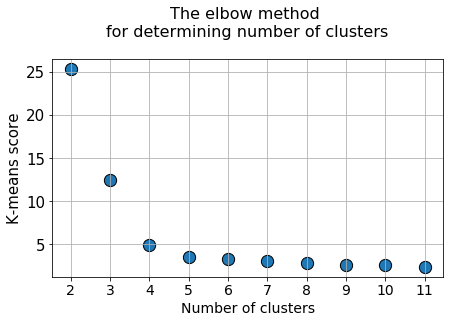

In [68]:
plt.figure(figsize=(7,4))
plt.title("The elbow method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

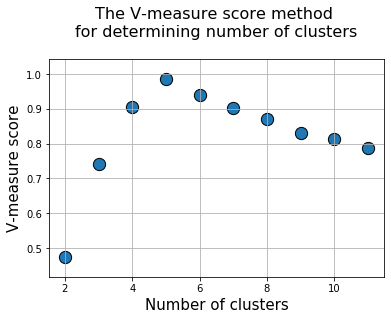

In [69]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.title("The V-measure score method \nfor determining number of clusters\n",fontsize=16)
plt.ylabel("V-measure score",fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.show()

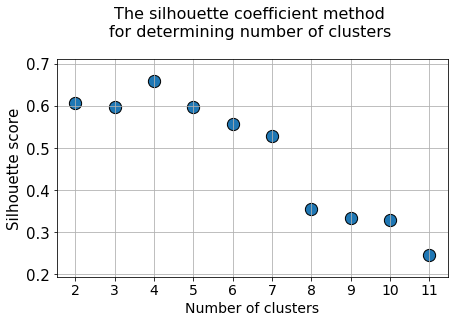

In [70]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters \n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

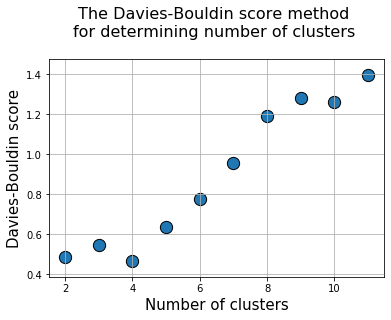

In [71]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.title("The Davies-Bouldin score method \nfor determining number of clusters \n",fontsize=16)
plt.ylabel("Davies-Bouldin score",fontsize=15)
plt.xlabel("Number of clusters",fontsize=15)
plt.show()

## Expectation-maximization (Gaussian Mixture Model)

In [76]:
from sklearn.mixture import GaussianMixture

In [77]:
gm_bic= []
gm_score=[]
for i in range(2,12):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -764.3276914371128
Log-likelihood score for number of cluster(s) 2: 2.2949472376675146
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -1094.2381568510036
Log-likelihood score for number of cluster(s) 3: 3.318410302447793
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -1166.6429243587593
Log-likelihood score for number of cluster(s) 4: 3.6981091224627334
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -1135.4705705966926
Log-likelihood score for number of cluster(s) 5: 3.818865139303118
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -1102.5687953251283
Log-likelihood score for number of cluster(s) 6: 3.9352976023697592

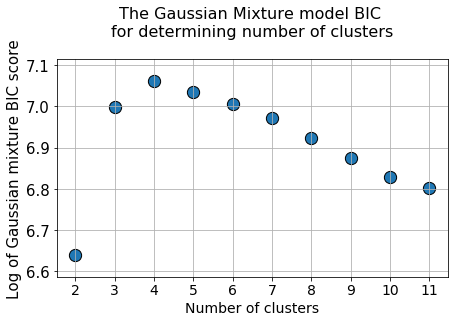

In [81]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

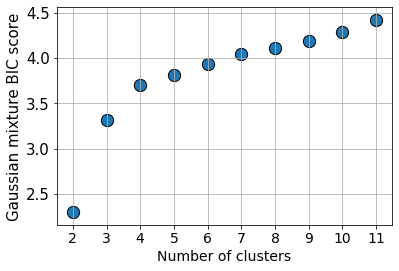

In [79]:
plt.scatter(x=[i for i in range(2,12)],y=gm_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()